<a href="https://colab.research.google.com/github/saket-crypto/user-management/blob/main/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakettj","key":"7da807d94b34db9fc06496b74c1ba5be"}'}

In [10]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
import shutil
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")


'/root/.kaggle/kaggle.json'

In [12]:
!chmod 600 /root/.kaggle/kaggle.json
!pip install kaggle

Dataset URL: https://www.kaggle.com/datasets/minahilfatima12328/performance-trends-in-education
License(s): CC0-1.0
performance-trends-in-education.zip: Skipping, found more recently modified local copy (use --force to force download)
Files in dataset folder: ['StudentPerformanceFactors.csv']
CSV files: ['StudentPerformanceFactors.csv']
Dataframe shape: (6607, 20)
Numeric columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Explained variance ratio for each PC: [0.25214912 0.1499744 ]
Sum of explained variance (for 2 PCs): 0.4021235201240285


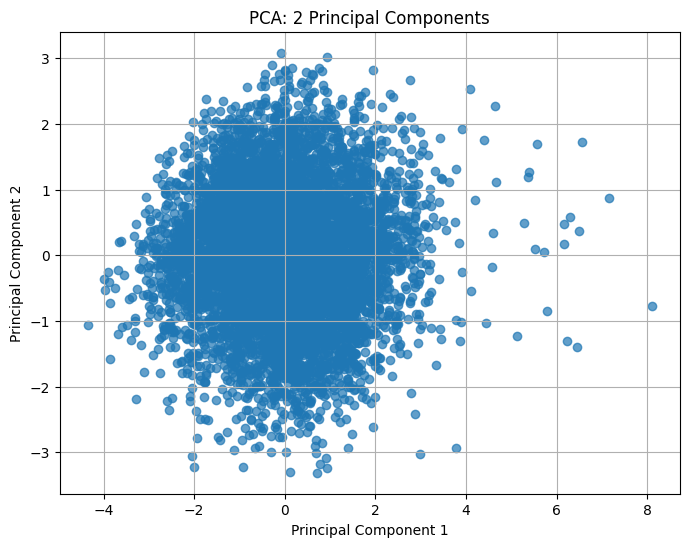

In [16]:
!kaggle datasets download -d minahilfatima12328/performance-trends-in-education
import zipfile
with zipfile.ZipFile("performance-trends-in-education.zip", 'r') as zip_ref:
    zip_ref.extractall("education_dataset")

import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. List the files in your dataset folder
data_folder = "education_dataset"  # change if you used a different folder name
print("Files in dataset folder:", os.listdir(data_folder))

# 2. Load the data
# Suppose there's a CSV named “Education.csv” — change this to whatever file you find
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
print("CSV files:", csv_files)

# If there's only one CSV:
df = pd.read_csv(os.path.join(data_folder, csv_files[0]))
print("Dataframe shape:", df.shape)
df.head()

# 3. Data preprocessing: select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print("Numeric columns:", numeric_df.columns)

# Optionally, drop columns that don’t make sense or have too many missing values:
# numeric_df = numeric_df.drop(columns=['some_column'])

# Handle missing values (if any) — for example, fill with mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# 4. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 5. Apply PCA — reduce to 2 dimensions (for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Put the PCA result into a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# 6. Check explained variance
print("Explained variance ratio for each PC:", pca.explained_variance_ratio_)
print("Sum of explained variance (for 2 PCs):", sum(pca.explained_variance_ratio_))

# 7. Plot the first 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2 Principal Components')
plt.grid(True)
plt.show()
